In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns

In [4]:
df = pd.read_csv('Data-Files/data2/House-Price.csv',header=0)

In [5]:
df.head()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
0,24.0,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347,0
1,21.6,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146,1
2,34.7,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764,0
3,33.4,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151,0
4,36.2,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   resid_area   506 non-null    float64
 2   air_qual     506 non-null    float64
 3   room_num     506 non-null    float64
 4   age          506 non-null    float64
 5   dist1        506 non-null    float64
 6   dist2        506 non-null    float64
 7   dist3        506 non-null    float64
 8   dist4        506 non-null    float64
 9   teachers     506 non-null    float64
 10  poor_prop    506 non-null    float64
 11  airport      506 non-null    object 
 12  n_hos_beds   498 non-null    float64
 13  n_hot_rooms  506 non-null    float64
 14  waterbody    506 non-null    object 
 15  rainfall     506 non-null    int64  
 16  bus_ter      506 non-null    object 
 17  parks        506 non-null    float64
 18  Sold         506 non-null    int64  
dtypes: float

<AxesSubplot:ylabel='n_hos_beds'>

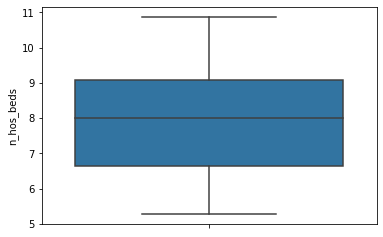

In [8]:
sns.boxplot(y='n_hos_beds',data=df)

<AxesSubplot:ylabel='n_hot_rooms'>

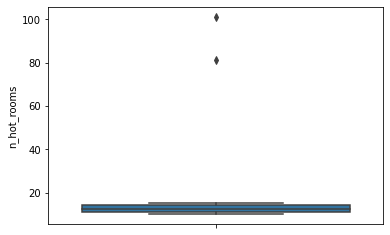

In [9]:
sns.boxplot(y='n_hot_rooms',data=df)

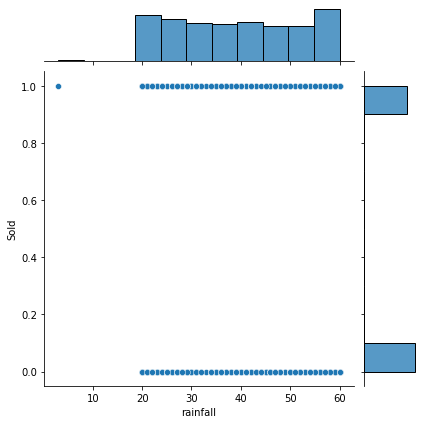

In [11]:
sns.jointplot(x='rainfall',y='Sold',data=df)

In [13]:
np.percentile(df.n_hot_rooms,[99])

array([15.39952])

In [14]:
np.percentile(df.n_hot_rooms,[99])[0]

15.39952

In [15]:
uv = np.percentile(df.n_hot_rooms,[99])[0]

In [16]:
df[(df.n_hot_rooms>uv)]

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
2,34.7,37.07,0.4690,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.12,None,38,YES,0.045764,0
166,50.0,49.58,0.6050,7.929,96.2,2.11,1.91,2.31,1.86,25.3,3.70,YES,8.300,15.40,River,37,YES,0.052105,0
204,50.0,32.68,0.4161,8.034,31.9,5.41,4.80,5.28,4.99,25.3,2.88,YES,8.900,15.40,River,51,YES,0.044178,0
267,50.0,33.97,0.5750,8.297,67.0,2.60,2.13,2.43,2.52,27.0,7.44,YES,8.000,15.40,None,42,YES,0.063235,0
369,50.0,48.10,0.6310,6.683,96.8,1.55,1.28,1.65,0.94,19.8,3.73,YES,6.700,15.40,River,58,YES,0.067477,0
423,13.4,48.10,0.6140,6.103,85.1,2.08,1.80,2.34,1.87,19.8,23.29,NO,8.268,81.12,Lake,29,YES,0.063344,0


In [17]:
df[(df.n_hot_rooms>3*uv)] = 3*uv

In [18]:
np.percentile(df.rainfall,[1])[0]

20.0

In [19]:
lv = np.percentile(df.rainfall,[1])[0]

In [20]:
df[(df.rainfall<lv)]

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
213,28.1,40.59,0.489,6.375,32.3,4.11,3.92,4.18,3.57,21.4,9.38,YES,7.562,10.2248,None,3.0,YES,0.044019,1.0


In [21]:
df.rainfall[(df.rainfall<0.3*lv)] = 0.3*lv

<ipython-input-21-211d44c7fcb4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rainfall[(df.rainfall<0.3*lv)] = 0.3*lv


In [22]:
df.n_hos_beds = df.n_hos_beds.fillna(df.n_hos_beds.mean())

In [23]:
df=df.fillna(df.mean())

<ipython-input-23-6f8c6f28e805>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df=df.fillna(df.mean())


In [24]:
df['avg_dist'] = (df.dist1+df.dist2+df.dist3+df.dist4)/4

In [25]:
del df['dist1']

In [26]:
del df['dist2']

In [27]:
del df['dist3']

In [28]:
del df['dist4']

In [30]:
del df['bus_ter']

In [31]:
df = pd.get_dummies(df)

In [32]:
df.head()

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,...,Sold,avg_dist,airport_46.19856,airport_NO,airport_YES,waterbody_46.19856,waterbody_Lake,waterbody_Lake and River,waterbody_None,waterbody_River
0,24.00000,32.31000,0.53800,6.57500,65.20000,24.70000,4.98000,5.48000,11.19200,23.00000,...,0.00000,4.08750,0,0,1,0,0,0,0,1
1,21.60000,37.07000,0.46900,6.42100,78.90000,22.20000,9.14000,7.33200,12.17280,42.00000,...,1.00000,4.96750,0,1,0,0,1,0,0,0
2,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,...,46.19856,46.19856,1,0,0,1,0,0,0,0
3,33.40000,32.18000,0.45800,6.99800,45.80000,21.30000,2.94000,9.26800,11.26720,45.00000,...,0.00000,6.06500,0,0,1,0,1,0,0,0
4,36.20000,32.18000,0.45800,7.14700,54.20000,21.30000,5.33000,8.82400,11.28960,55.00000,...,0.00000,6.06250,0,1,0,0,1,0,0,0


In [33]:
del df['airport_NO']

In [34]:
del df['waterbody_None']